<a href="https://colab.research.google.com/github/akanksha0911/Colab_assignment1/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Packages and Load Dataset**

In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
#download kaggle.json from kaggle.com - account- create API token
#upload kaggle.json file here
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"akanksharawat09","key":"9c3e77da413d009d43fd7cdf415940da"}'}

In [ ]:
#create a kaggle folder
!mkdir -p ~/.kaggle

In [ ]:
#copy the kaggle.json file to create folder
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [126]:
# copy kaggle API to import data from kaggle
!kaggle datasets download -d jessemostipak/hotel-booking-demand

  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 41.7MB/s]


In [127]:
#unzip the data file 
!unzip hotel-booking-demand.zip

Archive:  hotel-booking-demand.zip
  inflating: hotel_bookings.csv      


In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib 
import matplotlib.pyplot as plt

# A jupyter notebook specific command that let’s you see the plots in the notbook itself.
%matplotlib inline

In [129]:
df1 = pd.read_csv("/content/hotel_bookings.csv")
df1.shape

(119390, 32)

In [130]:
sum(df1.duplicated())

31994

In [131]:
df = df1.copy()

In [132]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


 Exploratory Data Analysis

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [134]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [136]:
#checking null values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [137]:
counts = df['country'].value_counts()
counts


PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
ATF        1
MDG        1
BHS        1
LCA        1
GUY        1
Name: country, Length: 177, dtype: int64

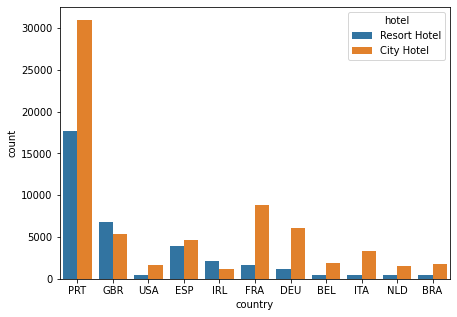

In [138]:
plt.subplots(figsize=(7,5))
sns.countplot(x='country', hue='hotel',  data=df[df['country'].isin(counts[counts > 2000].index)])
plt.show()

In [139]:
#filling null values and droping few 'not very useful' coloums 
df['agent'] = df['agent'].fillna(0)
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna('PRT')


# drop_col = ['days_in_waiting_list', 'arrival_date_year', 'assigned_room_type', 'arrival_date_week_number', 'booking_changes',
#                'reservation_status', 'days_in_waiting_list', 'customer_type', 'company', ]

# df.drop(drop_col, axis = 1, inplace = True)

In [140]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [146]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

In [147]:
df.shape

(119210, 32)

In [148]:
# adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time

filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [149]:
df.shape

(119210, 32)

In [150]:
df = df[~filter]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


How does the price vary per night over the year? - Trend of adr over the year

In [151]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [152]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [153]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel


,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [154]:
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel


,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


Data Pre processing

In [155]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [156]:
df.shape

(119210, 32)

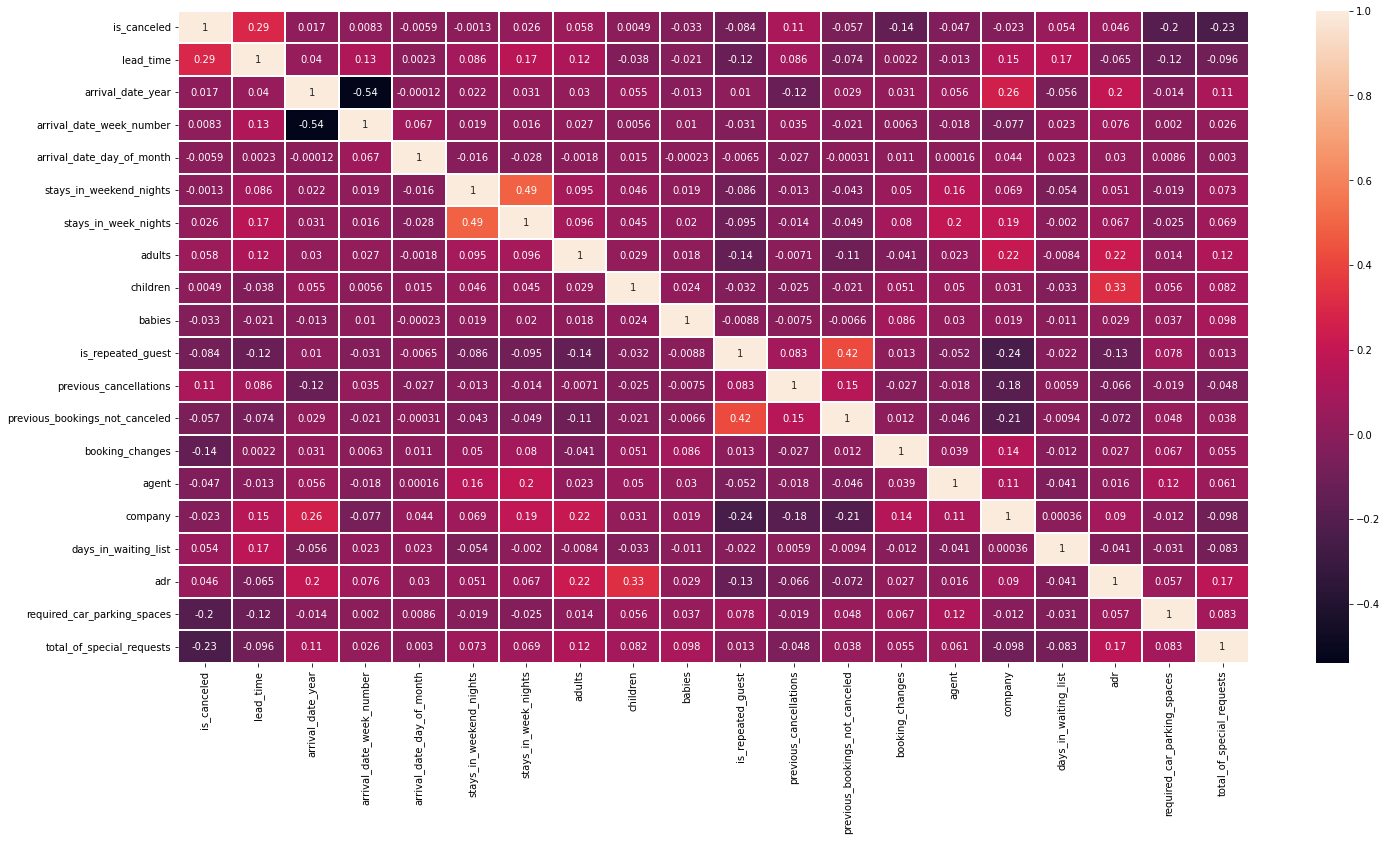

In [157]:
plt.figure(figsize = (24, 12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [159]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
company                           0.023439
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

We can see lead time is the most important factor for cancellation of booking

In [160]:
# dropping columns that are not useful

useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'company', 'days_in_waiting_list']

df.drop(useless_col, axis = 1, inplace = True)


In [161]:
#find the categorical features
a = df.select_dtypes(object).columns
for i in a:
    print (i, df[i].nunique())

hotel 2
arrival_date_month 12
meal 5
country 177
market_segment 8
distribution_channel 5
reserved_room_type 9
deposit_type 3
customer_type 4
reservation_status_date 926


In [162]:
#According to the above result, It's obvious that I can't use one hot encoding for most of our categorical features! 
#because that would create a lot of columns and adds a lot of complexity to our model. 
#Therefore I am going to use label encoding by Lable Encoder in sklearn 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])



In [163]:
df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day'] = df['reservation_status_date'].dt.day



In [164]:
df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

In [165]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,year,month,day
0,Resort Hotel,0,342,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,No Deposit,0.0,Transient,0.0,0,0,2015,7,1
1,Resort Hotel,0,737,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,No Deposit,0.0,Transient,0.0,0,0,2015,7,1
2,Resort Hotel,0,7,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,No Deposit,0.0,Transient,75.0,0,0,2015,7,2
3,Resort Hotel,0,13,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,No Deposit,304.0,Transient,75.0,0,0,2015,7,2
4,Resort Hotel,0,14,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,No Deposit,240.0,Transient,98.0,0,1,2015,7,3
5,Resort Hotel,0,14,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,No Deposit,240.0,Transient,98.0,0,1,2015,7,3
6,Resort Hotel,0,0,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,No Deposit,0.0,Transient,107.0,0,0,2015,7,3
7,Resort Hotel,0,9,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,No Deposit,303.0,Transient,103.0,0,1,2015,7,3
8,Resort Hotel,1,85,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,No Deposit,240.0,Transient,82.0,0,1,2015,5,6
9,Resort Hotel,1,75,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,No Deposit,15.0,Transient,105.5,0,0,2015,4,22


In [166]:
a = df.select_dtypes(object).columns
list_catv = []
for i in a:
    print (i, df[i].nunique())
    list_catv.append(i)

hotel 2
meal 5
country 177
market_segment 8
distribution_channel 5
reserved_room_type 9
deposit_type 3
customer_type 4


In [167]:
for i in list_catv:
    df[i] = le.fit_transform(df[i])
df['year'] = le.fit_transform(df['year'])
df['month'] = le.fit_transform(df['month'])
df['day'] = le.fit_transform(df['day'])

In [168]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,year,month,day
0,1,0,342,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,0,0.0,2,0.0,0,0,1,6,0
1,1,0,737,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,0,0.0,2,0.0,0,0,1,6,0
2,1,0,7,27,1,0,1,1,0.0,0,0,59,3,1,0,0,0,0,0,0.0,2,75.0,0,0,1,6,1
3,1,0,13,27,1,0,1,1,0.0,0,0,59,2,0,0,0,0,0,0,304.0,2,75.0,0,0,1,6,1
4,1,0,14,27,1,0,2,2,0.0,0,0,59,6,3,0,0,0,0,0,240.0,2,98.0,0,1,1,6,2
5,1,0,14,27,1,0,2,2,0.0,0,0,59,6,3,0,0,0,0,0,240.0,2,98.0,0,1,1,6,2
6,1,0,0,27,1,0,2,2,0.0,0,0,135,3,1,0,0,0,2,0,0.0,2,107.0,0,0,1,6,2
7,1,0,9,27,1,0,2,2,0.0,0,1,135,3,1,0,0,0,2,0,303.0,2,103.0,0,1,1,6,2
8,1,1,85,27,1,0,3,2,0.0,0,0,135,6,3,0,0,0,0,0,240.0,2,82.0,0,1,1,4,5
9,1,1,75,27,1,0,3,2,0.0,0,2,135,5,3,0,0,0,3,0,15.0,2,105.5,0,0,1,3,21


In [169]:
#check duplicate
sum(df.duplicated())

33790

In [170]:
#remove duplicate
df.drop_duplicates(inplace=True)


In [171]:
df.shape

(85420, 27)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



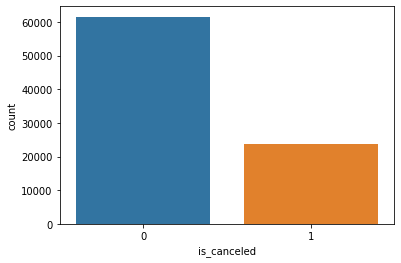

In [172]:
sns.countplot(df["is_canceled"])



    Canceling rate is pretty much high.
    70000> not canceled Vs. 40000> canceled.

**Train|Test Split**

In [173]:
# splitting data into training set and test set
from sklearn.model_selection import train_test_split
y = df['is_canceled']
X = df.drop('is_canceled', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)


X_train.head()

,hotel,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,year,month,day
114915,0,124,26,26,1,2,2,0.0,0,0,43,6,3,0,0,0,0,0,9.0,2,117.00,0,1,3,5,28
78276,0,12,42,13,0,4,1,0.0,0,0,135,5,3,0,1,0,0,0,99.0,3,0.00,0,0,1,9,6
99439,0,180,42,10,1,2,1,0.0,0,0,169,5,3,0,0,0,0,0,234.0,3,120.00,0,1,2,9,12
36025,1,111,18,1,2,5,2,0.0,0,1,81,5,3,0,0,0,0,0,243.0,2,92.95,0,0,3,4,7
53999,0,140,28,4,1,5,2,0.0,0,0,80,6,3,0,0,0,3,0,9.0,2,116.45,0,0,2,4,23


In [174]:
y_train.head(), y_test.head()


(114915    0
 78276     1
 99439     0
 36025     0
 53999     1
 Name: is_canceled, dtype: int64, 70764    1
 54978    1
 15265    0
 35195    0
 25573    0
 Name: is_canceled, dtype: int64)

**Feature Scaling**

In [175]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Train the model**

Decision Tree Classifier

In [176]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

**Evaluate the model**

In [177]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)
print(acc_dtc)
print(conf)
print(clf_report)

0.918559275735581
[[17421  1050]
 [ 1037  6118]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     18471
           1       0.85      0.86      0.85      7155

    accuracy                           0.92     25626
   macro avg       0.90      0.90      0.90     25626
weighted avg       0.92      0.92      0.92     25626



Logistic Regression

In [180]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver='liblinear')
logreg = log.fit(X_train,y_train)
y_pred_lr = logreg.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf_lr = confusion_matrix(y_test, y_pred_lr)
clf_report_lr = classification_report(y_test, y_pred_lr)
print(acc_lr)
print(conf_lr)
print(clf_report_lr)

0.7878326699445876
[[17488   983]
 [ 4454  2701]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87     18471
           1       0.73      0.38      0.50      7155

    accuracy                           0.79     25626
   macro avg       0.77      0.66      0.68     25626
weighted avg       0.78      0.79      0.76     25626



Random Forest Classifier

In [182]:
from sklearn.ensemble import RandomForestClassifier
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.935651291656911
Confusion Matrix : 
[[18195   276]
 [ 1373  5782]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     18471
           1       0.95      0.81      0.88      7155

    accuracy                           0.94     25626
   macro avg       0.94      0.90      0.92     25626
weighted avg       0.94      0.94      0.93     25626



Comparing Models

In [186]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier'],
               
    'Score' : [acc_lr, acc_dtc, acc_rd_clf]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest Classifier,0.935651
1,Decision Tree Classifier,0.918559
0,Logistic Regression,0.787833


In [187]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')